## EUR/PLN Time series - Currency exchange rate predictions

### Introduction

The theme of the project is currency exchange rate prediction. More specifically, I will focus on the EUR / PLN currency pair. The motivation to choose this particular pair is the fact that I am Polish and the Polish zloty is my national currency. Additionally, Poland belongs to the European Union, which makes the Polish economy highly dependent on the euro area. The second fact is that for some 2 years I have had daily contact with currency exchange because I receive a large part of my salary in euros, which is why it is important for me to predict and guess trends that are happening in this currency pair. Efficient selling and sometimes buying can easily improve my monthly income slightly.

The project is divided into three notebooks:
* 1) Collecting, transforming, supplementing and combining data for analysis
* 2) Time Series Forecasting with ARIMA
* 3) Time Series Forecasting with Machine Learning models

Let's begin

### Imports
Let's start by importing the necessary libraries. All libraries used in a given notebook are always imported at the beginning of the notebook.

In [8]:
import sys
sys.version

'3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)]'

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

## Core data

### Loading main data from Eurostat
The data is sourced from the website of the European statistical office Eurostat.


Link to current data: 'https://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist.zip?86fb86b2679253d2d41466caca451feb|'

In the project, I use data from 09/11/2020

In [132]:
currencies = pd.read_csv('Data/Eurostat/eurofxref-hist.csv')

In [133]:
currencies.head()

,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Unnamed: 42
0,2020-11-09,1.1883,124.67,1.9558,NaN,26.475,7.4476,NaN,0.90224,356.98,...,87.6380,1321.43,23.8949,4.8821,1.7378,57.213,1.5950,36.101,18.1305,NaN
1,2020-11-06,1.1870,122.66,1.9558,NaN,26.667,7.4493,NaN,0.90430,359.02,...,88.0085,1332.60,24.6840,4.9005,1.7507,57.192,1.5999,36.287,18.6933,NaN
2,2020-11-05,1.1855,122.86,1.9558,NaN,26.766,7.4467,NaN,0.90450,357.83,...,87.7405,1330.68,24.5016,4.9169,1.7540,57.218,1.6014,36.525,18.6894,NaN
3,2020-11-04,1.1721,122.31,1.9558,NaN,26.781,7.4466,NaN,0.89954,362.42,...,87.1955,1327.24,24.6474,4.8853,1.7541,56.717,1.5926,36.370,18.8090,NaN
4,2020-11-03,1.1702,122.56,1.9558,NaN,26.913,7.4462,NaN,0.90042,363.82,...,87.0695,1323.74,24.7581,4.8634,1.7531,56.584,1.5931,36.329,18.7681,NaN


In [134]:
currencies.shape

(5595, 43)

As you can see, the dataset consists of 5595 records and 43 columns. Let's check the basic information we can get.

In [135]:
currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5595 non-null   object 
 1   USD          5595 non-null   float64
 2   JPY          5595 non-null   float64
 3   BGN          5197 non-null   float64
 4   CYP          2304 non-null   float64
 5   CZK          5595 non-null   float64
 6   DKK          5595 non-null   float64
 7   EEK          3074 non-null   float64
 8   GBP          5595 non-null   float64
 9   HUF          5595 non-null   float64
 10  LTL          4097 non-null   float64
 11  LVL          3842 non-null   float64
 12  MTL          2304 non-null   float64
 13  PLN          5595 non-null   float64
 14  ROL          1664 non-null   float64
 15  RON          3931 non-null   float64
 16  SEK          5595 non-null   float64
 17  SIT          2049 non-null   float64
 18  SKK          2560 non-null   float64
 19  CHF   

In [136]:
currencies[['PLN','USD','GBP','CHF']].describe()

,PLN,USD,GBP,CHF
count,5595.000000,5595.000000,5595.000000,5595.000000
mean,4.121867,1.199646,0.767001,1.362558
std,0.282587,0.162928,0.100390,0.204843
min,3.205300,0.825200,0.571100,0.981600
25%,3.954150,1.097650,0.677350,1.162400
50%,4.170700,1.202000,0.787700,1.460800
75%,4.296800,1.321350,0.861700,1.548700
max,4.934600,1.599000,0.978550,1.680300


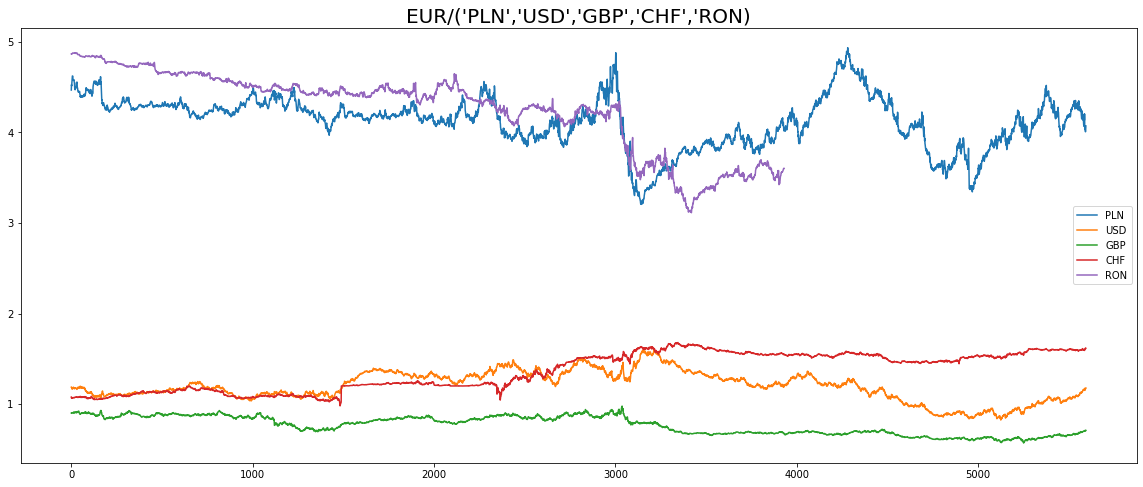

In [137]:
currencies[['PLN','USD','GBP','CHF','RON']].plot(figsize=(20,8))
plt.title("EUR/('PLN','USD','GBP','CHF','RON)", size = 20)
plt.show()

As you can see, our DataFrame is not yet a time series, so it is necessary to carry out several operations to reduce the data to the form of a time series.

To qualify a set as a time series, the data set must meet the following conditions:
- 1) Data must be time dependent
- 2) Data cannot be blank / untagged, data must be continuous
- 3) The data must have a fixed frequency


#### Set datetime data as index

In [138]:
currencies['Date'] = pd.to_datetime(currencies['Date'],dayfirst = True)
currencies = currencies.sort_values('Date')
currencies.set_index('Date', inplace = True)
currencies.head()

,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,LTL,...,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Unnamed: 42
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,1.1789,133.73,NaN,0.58231,35.107,7.4501,15.6466,0.71110,251.48,4.7170,...,NaN,1398.59,NaN,NaN,2.2229,NaN,1.9554,NaN,6.9358,NaN
1999-01-05,1.1790,130.96,NaN,0.58230,34.917,7.4495,15.6466,0.71220,250.80,4.7174,...,NaN,1373.01,NaN,NaN,2.2011,NaN,1.9655,NaN,6.7975,NaN
1999-01-06,1.1743,131.42,NaN,0.58200,34.850,7.4452,15.6466,0.70760,250.67,4.6994,...,NaN,1359.54,NaN,NaN,2.1890,NaN,1.9699,NaN,6.7307,NaN
1999-01-07,1.1632,129.43,NaN,0.58187,34.886,7.4431,15.6466,0.70585,250.09,4.6548,...,NaN,1337.16,NaN,NaN,2.1531,NaN,1.9436,NaN,6.8283,NaN
1999-01-08,1.1659,130.09,NaN,0.58187,34.938,7.4433,15.6466,0.70940,250.15,4.6643,...,NaN,1366.73,NaN,NaN,2.1557,NaN,1.9537,NaN,6.7855,NaN


In [139]:
currencies = currencies.drop('Unnamed: 42', axis = 1)

#### Remove not active currencies

Some of the currencies that are included in the Eurostat data are inactive. Therefore, it is necessary to remove them from our collection.

For this purpose, we will use the current ISO-4217 standard to verify which currencies are currently in use.

ISO Data Link: 'https://www.currency-iso.org/dam/downloads/lists/list_one.xls'

In [140]:
#Loading active currency list
df_country_list = pd.read_excel('https://www.currency-iso.org/dam/downloads/lists/list_one.xls', skiprows=3)
df_country_list.set_index('ENTITY', inplace = True)
df_country_list = df_country_list.iloc[:,:3].dropna()
df_country_list.to_csv('Data/country_list.csv')

In [141]:
df_country_list.head()

,Currency,Alphabetic Code,Numeric Code
ENTITY,,,
AFGHANISTAN,Afghani,AFN,971.0
ÅLAND ISLANDS,Euro,EUR,978.0
ALBANIA,Lek,ALL,8.0
ALGERIA,Algerian Dinar,DZD,12.0
AMERICAN SAMOA,US Dollar,USD,840.0


In [142]:
country_list = set(df_country_list['Alphabetic Code'].values)

In [143]:
not_active_currencies = [c for c in currencies if c not in country_list]
not_active_currencies

['CYP', 'EEK', 'LTL', 'LVL', 'MTL', 'ROL', 'SIT', 'SKK', 'TRL']

- 'CYP': 'Cypres pound',
- 'EEK': 'Estonian kroon',
- 'LTL': 'Lithuanian litas',
- 'LVL': 'Latvian lats',
- 'MTL': 'Maltese lira',
- 'ROL': 'Romanian old leu',
- 'SIT': 'Slovenian tolar',
- 'SKK': 'Slovak koruna',
- 'TRL': 'Turkish old lira',

These currencies were denominated and replaced by new national currencies, e.g. RON for Romania or the euro, e.g. Slovenia

In [144]:
for currency in not_active_currencies:
    if currency in currencies:
        currencies = currencies.drop(currency, axis = 1)

In [145]:
currencies.shape

(5595, 32)

#### Plot currencies histograms and line plot
Let's take a look at the histograms for each currency.

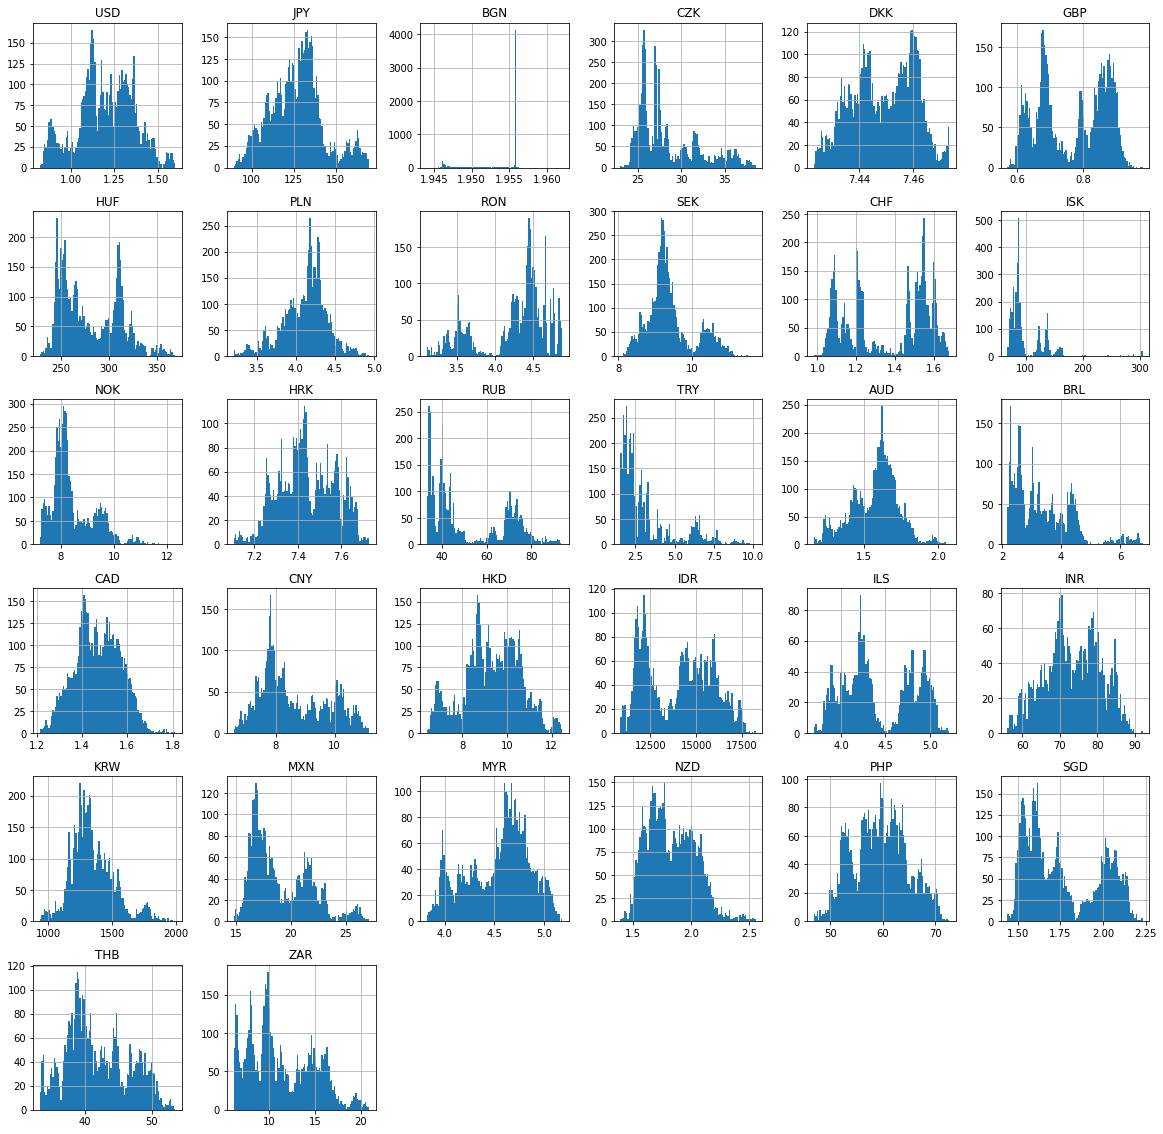

In [146]:
currencies.hist(bins = 100,figsize = (20,20))
plt.show()

##### Polish złoty histogram

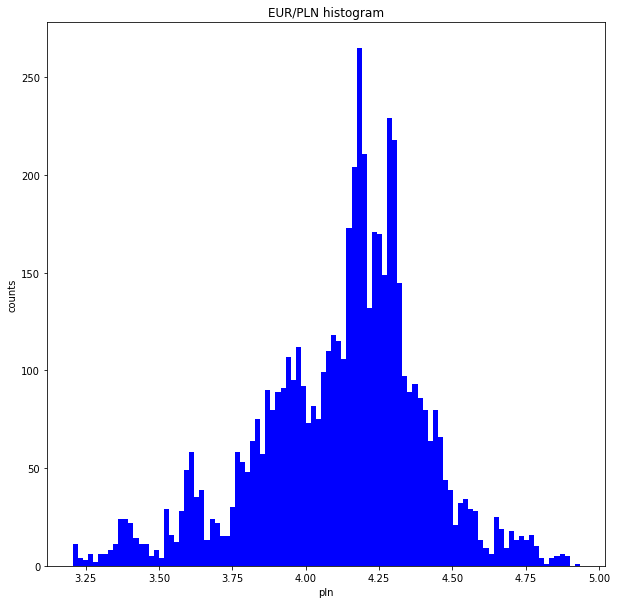

In [147]:
plt.figure(figsize = (10,10))
plt.hist(currencies['PLN'],bins = 100,color="b")
plt.title('EUR/PLN histogram')
plt.ylabel('counts')
plt.xlabel('pln')
xmin, xmax = plt.xlim()
plt.show()

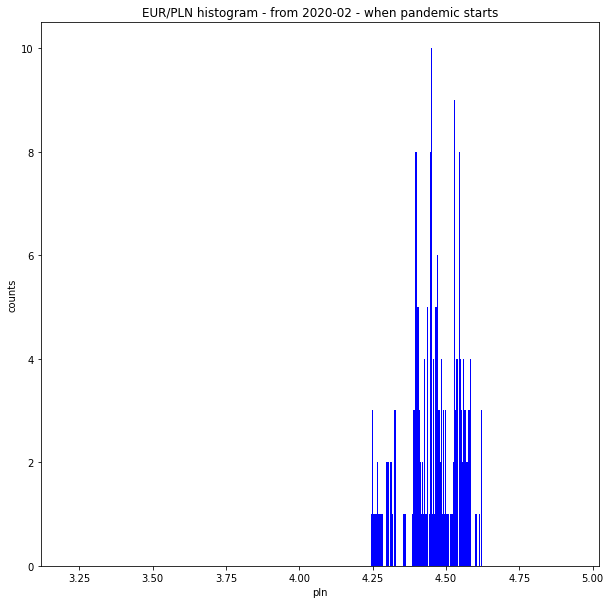

In [148]:
plt.figure(figsize = (10,10))
plt.hist(currencies.loc['2020-02':,'PLN'],bins = 100,color="b")
plt.title('EUR/PLN histogram - from 2020-02 - when pandemic starts' )
plt.ylabel('counts')
plt.xlabel('pln')
plt.xlim(xmin,xmax)
plt.show()

##### EUR/PLN Plot

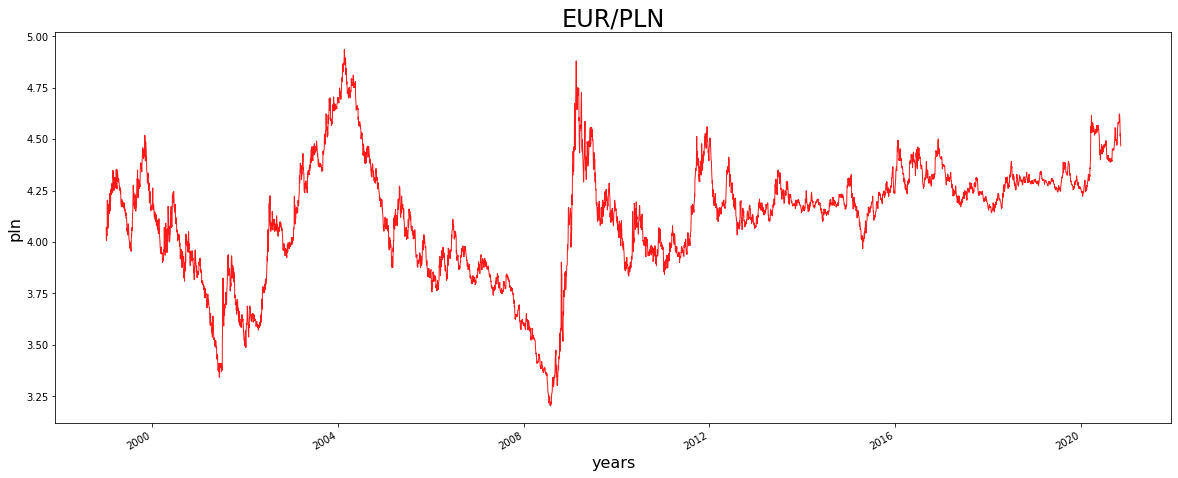

In [149]:
plt.figure(figsize=(20,8))
currencies['PLN'].plot(color = 'r',label = 'Open',linewidth=1,alpha = 0.9)
plt.xlabel('years', size = 16)              
plt.ylabel('pln', size = 16)
plt.title('EUR/PLN',size = 24)            
plt.show()

As shown by the data on the Polish currency fluctuations, they are significant in times of economic turmoil. One can also see less fluctuations along with the economic development, despite the changing economic situation.

#### Data continuity checking
To visualize data continuity, we will use the msno tool from the missingno library

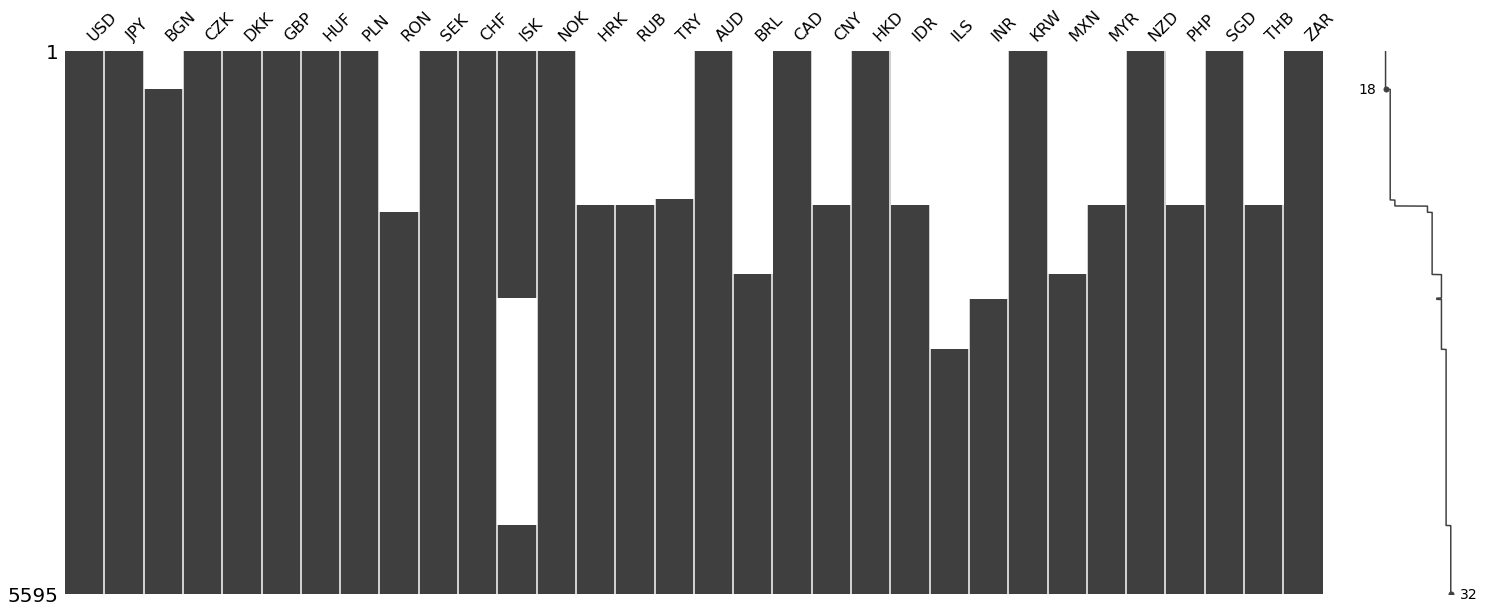

In [150]:
msno.matrix(currencies)
plt.show()

The data for 'ISK' is very leaky. Let's check what country it is currency.

In [151]:
df_country_list[df_country_list['Alphabetic Code'] == 'ISK']

,Currency,Alphabetic Code,Numeric Code
ENTITY,,,
ICELAND,Iceland Krona,ISK,352.0


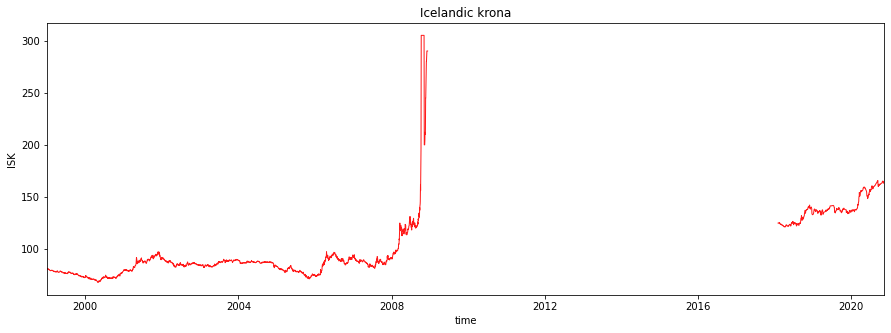

In [152]:
plt.figure(figsize=(15,5))
plt.plot(currencies.index,currencies['ISK'], color = 'r',label = 'Open',linewidth=1,alpha = 0.9)
plt.xlim(left=currencies.index.min(),right=currencies.index.max())
plt.xlabel('time')
plt.ylabel('ISK')
plt.title('Icelandic krona')            
plt.show()

Unfortunately, I have not yet found the reasons why the Icelandic currency is temporarily missing

#### Heat map correlation

Let's check what correlations exist between currencies

In [153]:
corr_data = currencies.corr()

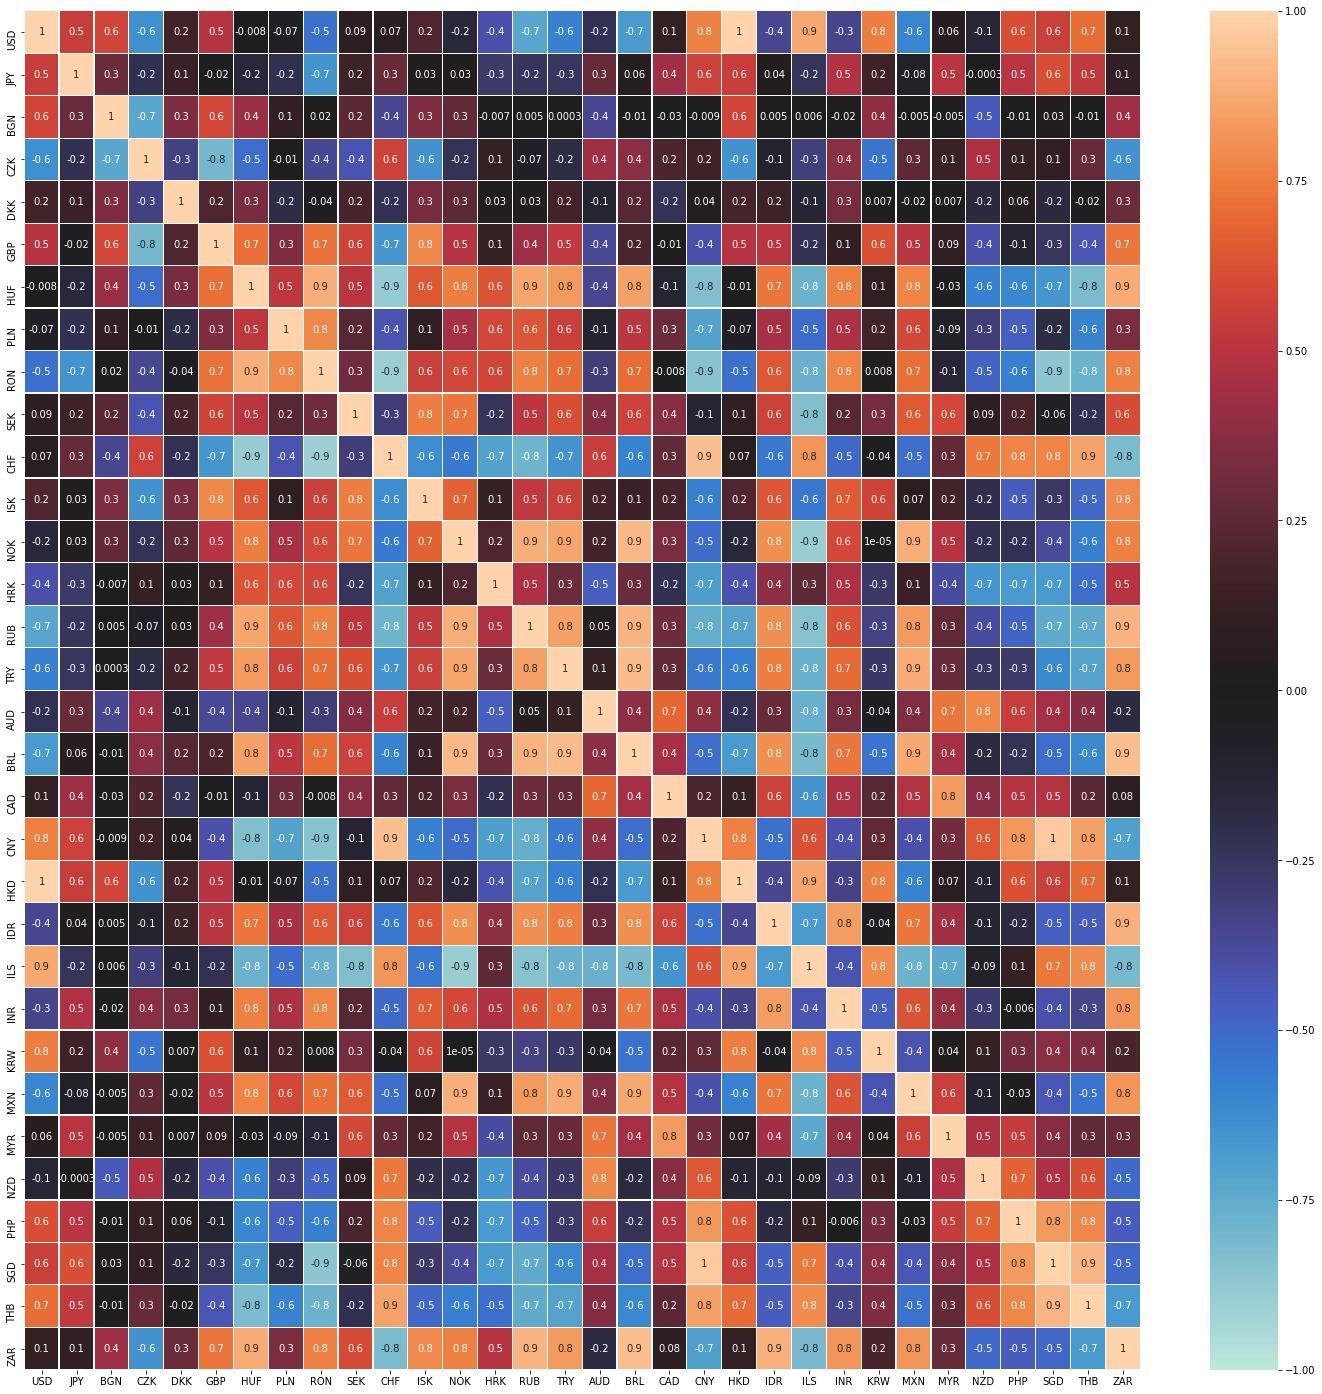

In [154]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr_data, vmin=-1, vmax=1, center=0, robust=False, annot=True, fmt='.1g', annot_kws=None, linewidths=0.2, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

#### treshold correlatrion filter

In [155]:
treshold = 0.4

In [156]:
corr_data_to_print = corr_data[((corr_data['PLN'] > treshold) | (corr_data['PLN'] < - treshold))][['PLN']]
corr_data_to_print

,PLN
HUF,0.517840
PLN,1.000000
RON,0.775335
CHF,-0.429510
NOK,0.455355
HRK,0.587906
RUB,0.639123
TRY,0.555893
BRL,0.510454
CNY,-0.705749


In [157]:
temp_list = corr_data_to_print.index.tolist()
for c in temp_list:
    cuntry = df_country_list[df_country_list['Alphabetic Code'] == c][['Currency']].index[0]
    currency_name = df_country_list[df_country_list['Alphabetic Code'] == c][['Currency']].values[0][0]
    print(f'{c} - {currency_name} - {cuntry}')

HUF - Forint - HUNGARY
PLN - Zloty - POLAND
RON - Romanian Leu - ROMANIA
CHF - Swiss Franc - LIECHTENSTEIN
NOK - Norwegian Krone - BOUVET ISLAND
HRK - Kuna - CROATIA
RUB - Russian Ruble - RUSSIAN FEDERATION (THE)
TRY - Turkish Lira - TURKEY
BRL - Brazilian Real - BRAZIL
CNY - Yuan Renminbi - CHINA
IDR - Rupiah - INDONESIA
ILS - New Israeli Sheqel - ISRAEL
INR - Indian Rupee - BHUTAN
MXN - Mexican Peso - MEXICO
PHP - Philippine Peso - PHILIPPINES (THE)
THB - Baht - THAILAND


It can be noticed that the Polish currency is correlated with other currencies of countries classified as exotic currencies, which are not the main wault, which are traded on financial markets.

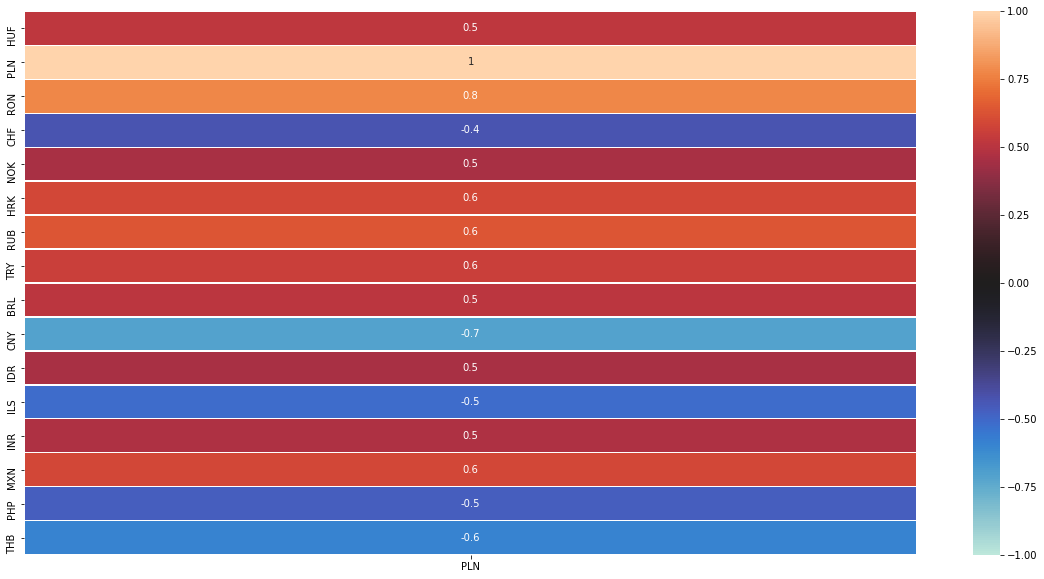

In [158]:
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_data_to_print, vmin=-1, vmax=1, center=0, robust=False, annot=True, fmt='.1g', annot_kws=None, linewidths=0.2, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

Due to the immateriality of the Icelandic currency for the Polish zloty exchange rate. I will drop the Icelandic currency from the dataset.

In [159]:
currencies = currencies.drop('ISK', axis = 1)

#### Filling missing data and set data frequency to 1B - 1 buissnes week

Due to the fact that it operates on currency data, and for this type of data, the frequency is assumed to be 1 business week, which is counted from Monday to Friday, each week. Due to the fact that some days are non-working days, the missing data is supplemented with the previous day.


In [161]:
print(f'Data frequency: {pd.infer_freq(currencies.index)}')

Data frequency: None


The data has no frequency at the moment

In [162]:
currencies = currencies.resample('1B').ffill()

In [164]:
print(f'Data frequency: {pd.infer_freq(currencies.index)}')

Data frequency: B


In [165]:
currencies_temp = currencies.ffill()

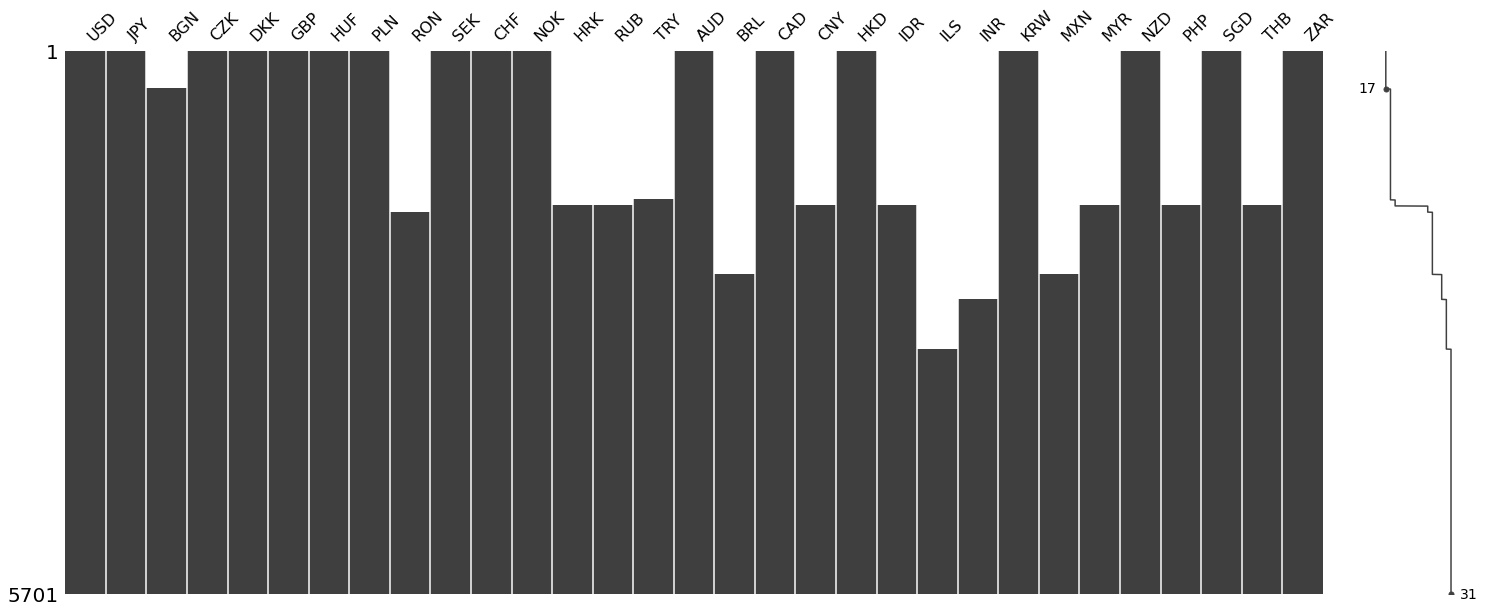

In [166]:
msno.matrix(currencies_temp)
plt.show()

In [167]:
currencies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5701 entries, 1999-01-04 to 2020-11-09
Freq: B
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     5701 non-null   float64
 1   JPY     5701 non-null   float64
 2   BGN     5299 non-null   float64
 3   CZK     5701 non-null   float64
 4   DKK     5701 non-null   float64
 5   GBP     5701 non-null   float64
 6   HUF     5701 non-null   float64
 7   PLN     5701 non-null   float64
 8   RON     4007 non-null   float64
 9   SEK     5701 non-null   float64
 10  CHF     5701 non-null   float64
 11  NOK     5701 non-null   float64
 12  HRK     4072 non-null   float64
 13  RUB     4072 non-null   float64
 14  TRY     4136 non-null   float64
 15  AUD     5701 non-null   float64
 16  BRL     3354 non-null   float64
 17  CAD     5701 non-null   float64
 18  CNY     4072 non-null   float64
 19  HKD     5701 non-null   float64
 20  IDR     4072 non-null   float64
 21  ILS     257

### Save data to csv

In [168]:
currencies.to_csv('Data/currencies.csv')

#### Conclusions

My main data is ready for further analysis.

I removed the incomplete data.
I completed the missing data.
I brought the data down to the Time Series

I'm adding extra data to my DataFrame. The reason is that the exchange rate depends on the country's economy and therefore basic economic indicators are needed.

As sources, I will use:
- 1) SpotData portal
- 2) NBP portal
- 3) EuroStat portal

## Extra data

### Loading data from Spotdata
Link: https://spotdata.pl/najwazniejsze-dane#/v/produkt-krajowy-brutto-pkb-607

Data are not in one file thats why I has to read few file to one dataframe.

In [169]:
import glob
file_list = glob.glob('Data/Spotdata/*.csv')
file_list

['Data/Spotdata\\Bieżąca ogólna sytuacja gospodarcza przedsiębiorstwa, ogółem.csv',
 'Data/Spotdata\\Bieżący wskaźnik ufności konsumenckiej.csv',
 'Data/Spotdata\\ceny_towarow_i_uslug_m.csv',
 'Data/Spotdata\\dlug_skarbu_panstwa_ogolem.csv',
 'Data/Spotdata\\dlug_zagraniczny_skarbu_panstwa_m.csv',
 'Data/Spotdata\\handel_zagraniczny_ogolem.csv',
 'Data/Spotdata\\handel_zagraniczny_saldo_ogolem.csv',
 'Data/Spotdata\\import_ogolem.csv',
 'Data/Spotdata\\mediana_prognoz_PKB_d.csv',
 'Data/Spotdata\\miedzynarodowa_pozycja_inwestycjna.csv',
 'Data/Spotdata\\naklad_na_srodki_trwale_k.csv',
 'Data/Spotdata\\oprocentowanie_nowe_depozyty_m.csv',
 'Data/Spotdata\\oprocentowanie_nowe_kredyty_m.csv',
 'Data/Spotdata\\pkb_k.csv',
 'Data/Spotdata\\sprzedaż produkcji budowlano-montażowej - ogółem.csv',
 'Data/Spotdata\\stopa_bezrobocia_rejestrowanego.csv',
 'Data/Spotdata\\stopa_referencyjna_NBP.csv']

In [170]:
pd.read_csv(file_list[0], sep = ';',decimal = ',')

,Data,"Bieżąca ogólna sytuacja gospodarcza przedsiębiorstwa, ogółem"
0,2000-01-01,-17.2
1,2000-02-01,-18.6
2,2000-03-01,-16.5
3,2000-04-01,-14.1
4,2000-05-01,-16.3
...,...,...
245,2020-06-01,-24.2
246,2020-07-01,-16.7
247,2020-08-01,-6.5
248,2020-09-01,-5.0


#### Shifting and formating functrion

In [171]:
def shift_data(df,start, stop):
    temp_df = df.sort_values(by = df.columns[0])
    temp_df.set_index(temp_df.columns[0], inplace = True)
    temp_df = temp_df.astype('float64')
    freq = pd.infer_freq(temp_df.index)
    if freq is not None:
        full_idx_t = pd.date_range(start=start, end=stop, freq=freq)
        df_time_t = pd.DataFrame(full_idx_t,columns = [temp_df.index.name])
        df_time_t.set_index(temp_df.index.name, inplace = True)
        df_time_t = df_time_t.join(temp_df)
        df_time_t = df_time_t.shift(1)
        return df_time_t
    else:
        return temp_df
    

#### Data concatenation

In [172]:
full_idx = pd.date_range(start=currencies.index.min(), end=currencies.index.max(), freq='1B')
df_time = pd.DataFrame(full_idx,columns = ['Data'])
df_time.set_index('Data', inplace = True)
file_list_len = len(file_list)
for i in range(file_list_len):
    df = pd.read_csv(file_list[i], sep = ';',decimal = ',')
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.sort_values('Data')
    df.set_index('Data', inplace = True)
    freq = pd.infer_freq(df.index)
    print(f'Data frequency: {freq}')
    df_time = df_time.join(df, on = 'Data')

Data frequency: MS
Data frequency: MS
Data frequency: MS
Data frequency: MS
Data frequency: MS
Data frequency: MS
Data frequency: MS
Data frequency: MS
Data frequency: D
Data frequency: QS-DEC
Data frequency: QS-DEC
Data frequency: MS
Data frequency: MS
Data frequency: QS-DEC
Data frequency: MS
Data frequency: MS
Data frequency: None


As we see Data have different frequency. Additionally, we must be aware that the macroeconomic data for the previous month are released at the beginning of present month, so we will use October data to predict the November data.

In [177]:
df_time.tail(10)

,"Bieżąca ogólna sytuacja gospodarcza przedsiębiorstwa, ogółem",Bieżący wskaźnik ufności konsumenckiej,Ceny towarów i usług konsumpcyjnych - ogółem,"Dług skarbu państwa, ogółem","Dług zagraniczny skarbu państwa, ogółem",Handel zagraniczny wg GUS - eksport ogółem,Handel zagraniczny wg GUS - saldo ogółem,Handel zagraniczny wg GUS - import ogółem,Mediana prognoz wzrostu PKB Polski w 2020 r.,"Międzynarodowa pozycja inwestycyjna, międzynarodowa pozycja inwestycyjna netto",Nakłady brutto na środki trwałe,"Oprocentowanie nowych depozytów, ogółem","Oprocentowanie nowych kredytów, ogółem",Produkt krajowy brutto (PKB),Sprzedaż produkcji budowlano-montażowej - ogółem,Stopa bezrobocia rejestrowanego,Stopa referencyjna NBP
Data,,,,,,,,,,,,,,,,,
2020-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1


In [178]:
df_time.tail(10)

,"Bieżąca ogólna sytuacja gospodarcza przedsiębiorstwa, ogółem",Bieżący wskaźnik ufności konsumenckiej,Ceny towarów i usług konsumpcyjnych - ogółem,"Dług skarbu państwa, ogółem","Dług zagraniczny skarbu państwa, ogółem",Handel zagraniczny wg GUS - eksport ogółem,Handel zagraniczny wg GUS - saldo ogółem,Handel zagraniczny wg GUS - import ogółem,Mediana prognoz wzrostu PKB Polski w 2020 r.,"Międzynarodowa pozycja inwestycyjna, międzynarodowa pozycja inwestycyjna netto",Nakłady brutto na środki trwałe,"Oprocentowanie nowych depozytów, ogółem","Oprocentowanie nowych kredytów, ogółem",Produkt krajowy brutto (PKB),Sprzedaż produkcji budowlano-montażowej - ogółem,Stopa bezrobocia rejestrowanego,Stopa referencyjna NBP
Data,,,,,,,,,,,,,,,,,
2020-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1


#### Data continuity checking

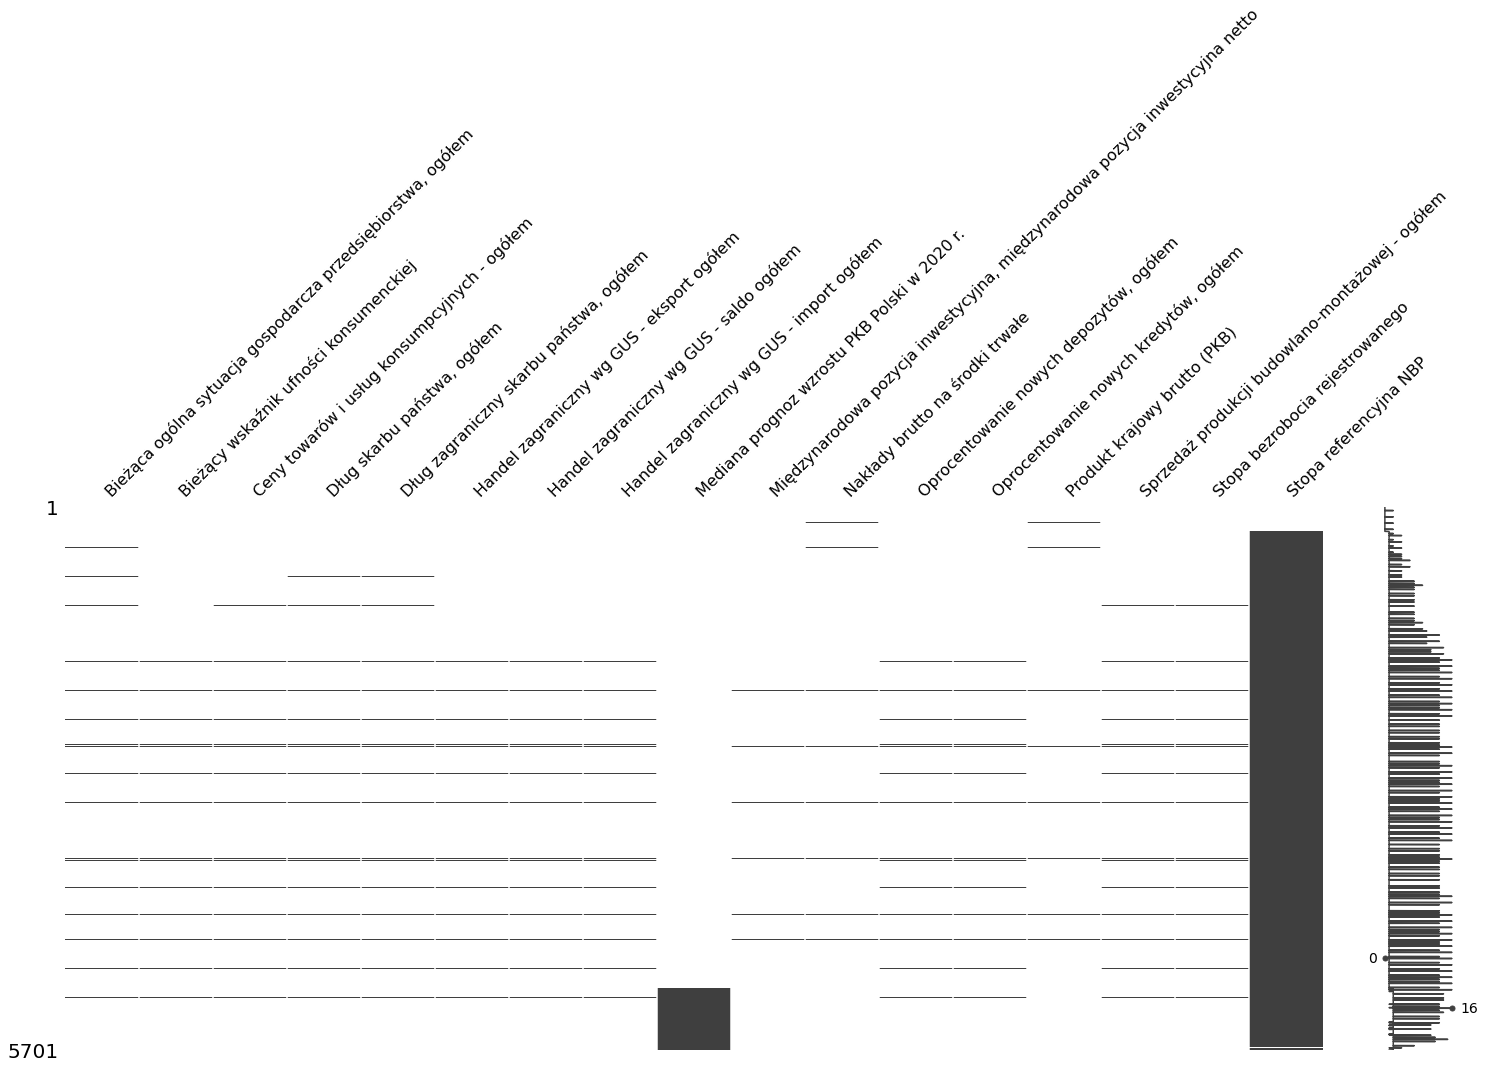

In [179]:
msno.matrix(df_time)
plt.show()

We will load data again but by using shift_data functrion and with ffill method.

In [180]:
full_idx = pd.date_range(start=currencies.index.min(), end=currencies.index.max(), freq='1B')
df_time2 = pd.DataFrame(full_idx,columns = ['Data'])
df_time2.set_index('Data', inplace = True)
file_list_len = len(file_list)
for i in range(file_list_len):
    df = pd.read_csv(file_list[i], sep = ';',decimal = ',')
    df =shift_data(df, currencies.index.min(),currencies.index.max())
    df_time2 = df_time2.join(df).ffill()

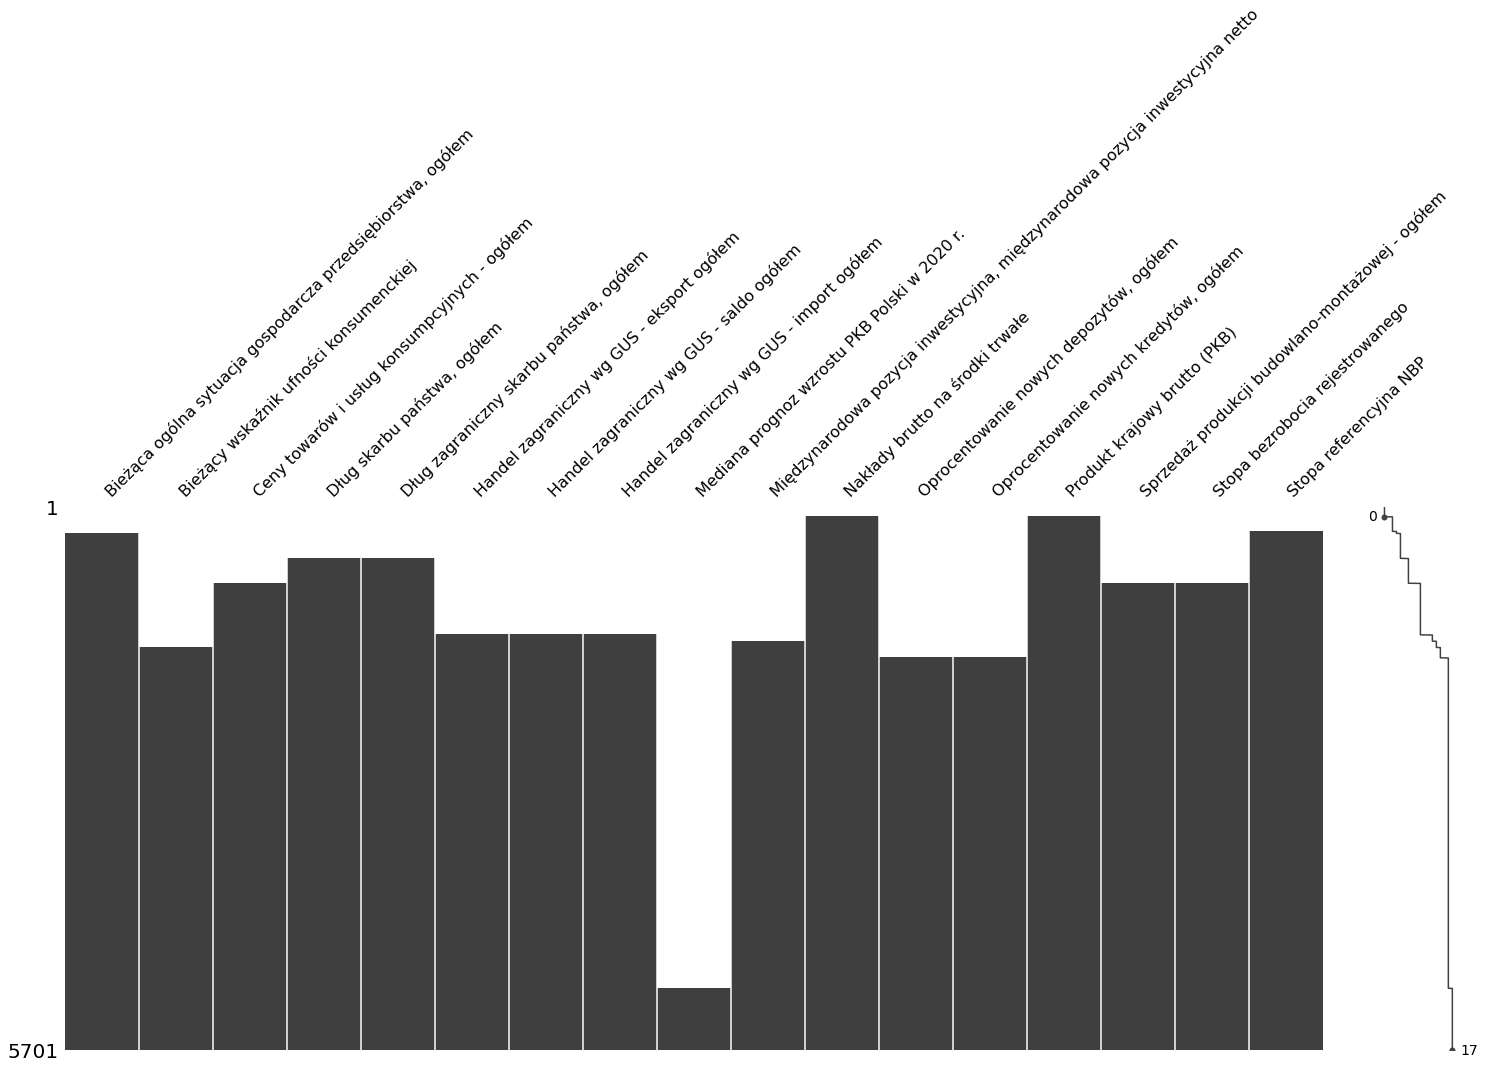

In [181]:
msno.matrix(df_time2)
plt.show()

#### Printing spotdata plots

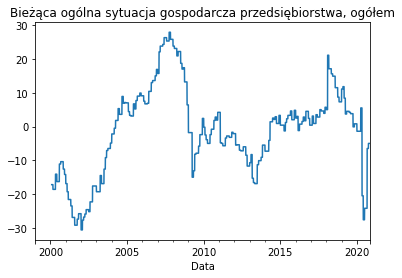

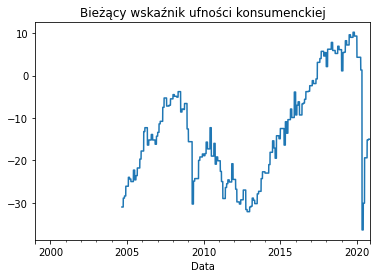

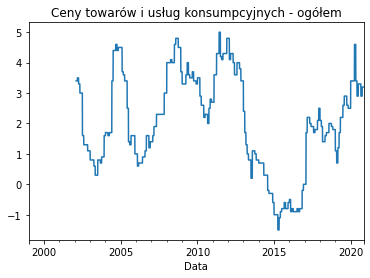

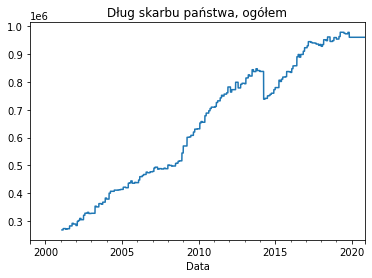

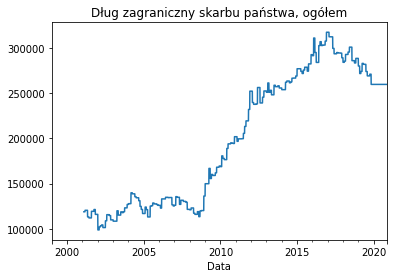

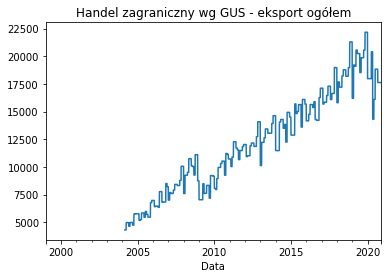

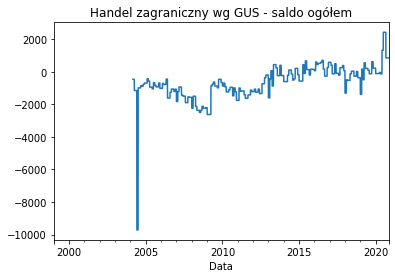

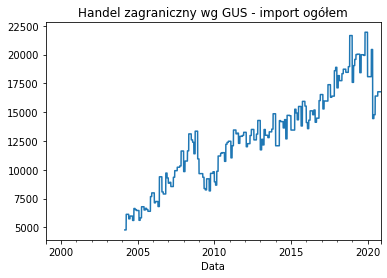

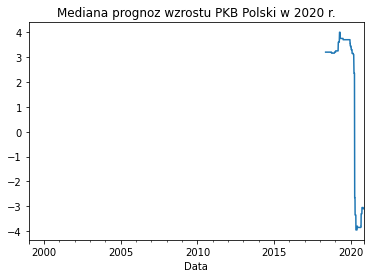

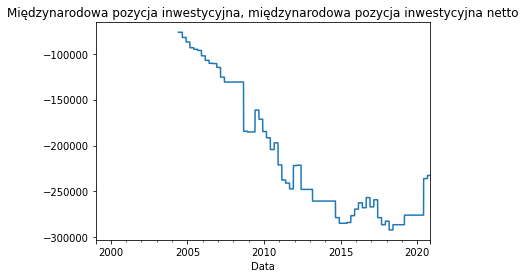

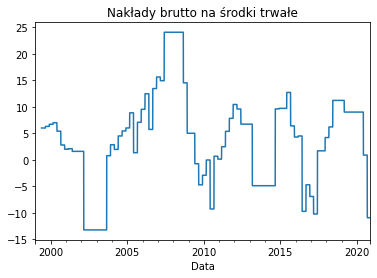

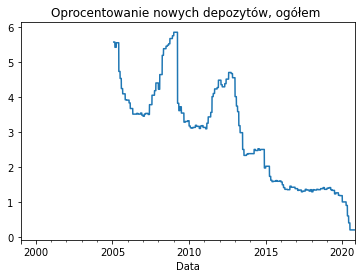

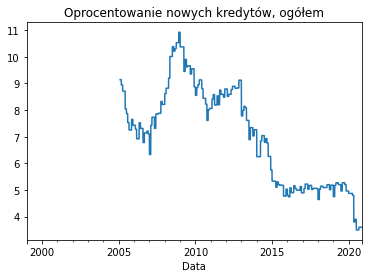

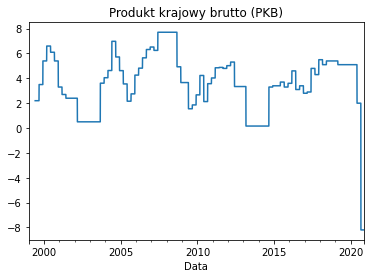

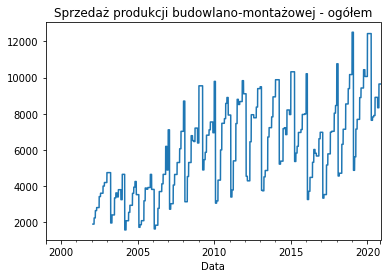

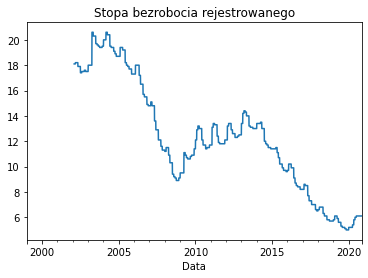

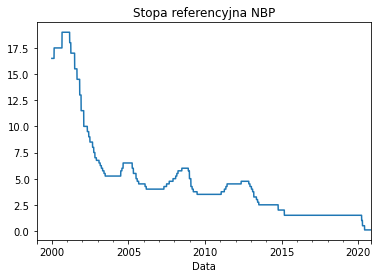

In [182]:
for i in range(file_list_len):
    df_time2.iloc[:,i].plot()
    plt.title(df_time2.columns[i])
    plt.show()

In [53]:
df_time2.index.rename("Date",inplace = True)

#### Stopa referencyjna NBP - column shifting(1)
Because shift_data functrion doesn't work with day frequency data we need to shift "Stopa referencyjna NBP" column manualy.

In [183]:
df_time2['Stopa referencyjna NBP'] = df_time2['Stopa referencyjna NBP'].shift(1)

#### Save data to csv

In [187]:
df_time2.to_csv('Data/spotdata.csv')

### Joining "core" data with "spotdata" data

In [184]:
currencies_3 = currencies.join(df_time2, on = 'Date')

In [185]:
currencies_3.tail()

,USD,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,SEK,...,Handel zagraniczny wg GUS - import ogółem,Mediana prognoz wzrostu PKB Polski w 2020 r.,"Międzynarodowa pozycja inwestycyjna, międzynarodowa pozycja inwestycyjna netto",Nakłady brutto na środki trwałe,"Oprocentowanie nowych depozytów, ogółem","Oprocentowanie nowych kredytów, ogółem",Produkt krajowy brutto (PKB),Sprzedaż produkcji budowlano-montażowej - ogółem,Stopa bezrobocia rejestrowanego,Stopa referencyjna NBP
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-03,1.1702,122.56,1.9558,26.913,7.4462,0.90042,363.82,4.5680,4.8675,10.3835,...,16771.8,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1
2020-11-04,1.1721,122.31,1.9558,26.781,7.4466,0.89954,362.42,4.5368,4.8675,10.3520,...,16771.8,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1
2020-11-05,1.1855,122.86,1.9558,26.766,7.4467,0.90450,357.83,4.5134,4.8648,10.2770,...,16771.8,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1
2020-11-06,1.1870,122.66,1.9558,26.667,7.4493,0.90430,359.02,4.5263,4.8670,10.2805,...,16771.8,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1
2020-11-09,1.1883,124.67,1.9558,26.475,7.4476,0.90224,356.98,4.4670,4.8655,10.1970,...,16771.8,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1


In [186]:
currencies_3.shape


(5701, 48)

### Loading additional data from Eurostat
ECB Nominal effective exch. rate of the Polish zloty against, EER-19 group of trading partners can be quite predictive, so we will add this data to our DataFrame.

In [58]:
df_eurostat = pd.read_csv('Data/Eurostat/ECB Nominal effective exch rate of the Polish zloty against EER-19.csv',skiprows=4)

In [59]:
df_eurostat.head()

,Period\Unit:,[99Q1=100]
0,2020-11-11,93.7370
1,2020-11-10,93.5770
2,2020-11-09,94.3940
3,2020-11-06,93.2163
4,2020-11-05,93.4708


#### Data formating to time series

In [60]:
df_eurostat.columns = ['Date', 'Exch rate']

In [61]:
df_eurostat['Date'] = pd.to_datetime(df_eurostat['Date'])
df_eurostat = df_eurostat.sort_values('Date')
df_eurostat.set_index('Date', inplace = True)
df_eurostat['Exch rate'].replace(to_replace = '-',method='ffill',inplace=True)
df_eurostat['Exch rate'] = df_eurostat['Exch rate'].astype('float64')
df_eurostat.head()

,Exch rate
Date,
1993-01-04,212.2951
1993-01-05,211.1050
1993-01-06,211.1050
1993-01-07,211.2685
1993-01-08,211.7371


#### Shift(1)
Don't forget that we have to have past data

In [62]:
df_eurostat['Exch rate'] = df_eurostat['Exch rate'].shift(1)

In [63]:
print(pd.infer_freq(df_eurostat.index))

B


#### Plot 'ECB Nominal effective exch rate of the Polish zloty against EER-19'

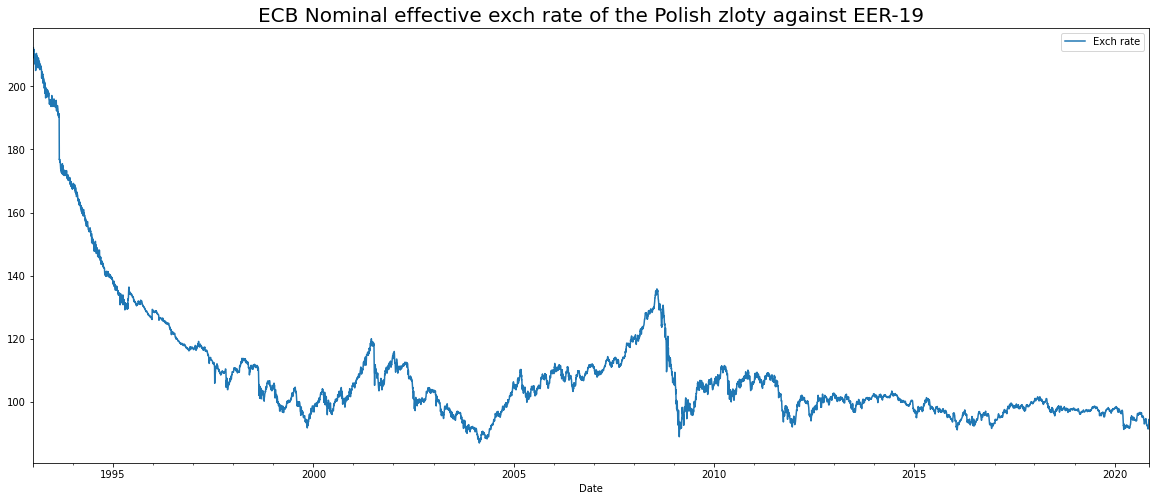

In [193]:
df_eurostat.plot(figsize = (20,8))
plt.title('ECB Nominal effective exch rate of the Polish zloty against EER-19', size = 20)
plt.show()

#### Save data to csv

In [195]:
df_eurostat.to_csv('Data/exch_rate.csv')

### Joining "core" data with "Eurostat Exch rate" data

In [196]:
currencies_4 = currencies_3.join(df_eurostat, on = 'Date')

In [197]:
currencies_4.tail()

,USD,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,SEK,...,Mediana prognoz wzrostu PKB Polski w 2020 r.,"Międzynarodowa pozycja inwestycyjna, międzynarodowa pozycja inwestycyjna netto",Nakłady brutto na środki trwałe,"Oprocentowanie nowych depozytów, ogółem","Oprocentowanie nowych kredytów, ogółem",Produkt krajowy brutto (PKB),Sprzedaż produkcji budowlano-montażowej - ogółem,Stopa bezrobocia rejestrowanego,Stopa referencyjna NBP,Exch rate
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-03,1.1702,122.56,1.9558,26.913,7.4462,0.90042,363.82,4.5680,4.8675,10.3835,...,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1,91.6251
2020-11-04,1.1721,122.31,1.9558,26.781,7.4466,0.89954,362.42,4.5368,4.8675,10.3520,...,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1,92.3143
2020-11-05,1.1855,122.86,1.9558,26.766,7.4467,0.90450,357.83,4.5134,4.8648,10.2770,...,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1,92.8912
2020-11-06,1.1870,122.66,1.9558,26.667,7.4493,0.90430,359.02,4.5263,4.8670,10.2805,...,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1,93.4708
2020-11-09,1.1883,124.67,1.9558,26.475,7.4476,0.90224,356.98,4.4670,4.8655,10.1970,...,-3.1,-232544.0,-10.9,0.2,3.6,-8.2,9644.6,6.1,0.1,93.2163


### Loading data from NBP

In [225]:
file_list_xlsx = glob.glob('Data/NBP/*.xlsx')

In [226]:
file_list_xlsx

['Data/NBP\\Dane_2008.10.xlsx',
 'Data/NBP\\Dane_2009.10.xlsx',
 'Data/NBP\\Dane_2010.10.xlsx',
 'Data/NBP\\Dane_2011.11.xlsx',
 'Data/NBP\\Dane_2012.11.xlsx',
 'Data/NBP\\Dane_2013.11.xlsx',
 'Data/NBP\\Dane_2014.11.xlsx',
 'Data/NBP\\Dane_2016.11.xlsx',
 'Data/NBP\\Dane_2017.11.xlsx',
 'Data/NBP\\Dane_2018.11.xlsx',
 'Data/NBP\\Dane_2019.11.xlsx',
 'Data/NBP\\Data_2015.11.xlsx',
 'Data/NBP\\Projekcja_inflacji i wzrpstu gospodarczego_Dane_2020.11.xlsx']

In [227]:
pd.read_excel('Data/NBP\\Dane_2008.10.xlsx',)

,Unnamed: 0,2007,2008,2009,2010
0,Wskaźnik cen konsumenta CPI (% r/r),2.50,4.30,4.70,3.20
1,Ceny żywności (% r/r),4.80,6.30,3.00,-0.40
2,Ceny energii (% r/r),3.80,8.80,10.50,9.30
3,Wskaźnik cen inflacji bazowej po wyłączeni...,1.00,2.40,4.00,3.20
4,PKB (% r/r),6.70,5.10,2.80,3.60
5,Popyt krajowy (% r/r),8.60,5.50,2.40,3.00
6,Spożycie indywidualne (% r/r),5.00,4.80,4.60,3.70
7,Spożycie zbiorowe (% r/r),3.70,0.20,1.00,1.40
8,Nakłady inwestycyjne (% r/r),17.60,13.10,4.30,2.80
9,Wkład eksportu netto (pkt. proc. r/r),-2.00,-0.60,0.30,0.50


#### Data formating to time series

In [228]:
def convert_year(data):
    new_col_names = []
    columns = data.columns
    for c in columns:
        if 'q' in str(c):
            n = (int(c[3]) - 1)*3 + 1
            n_str = f'20{c[:2]}-{n}'
            new_col_names.append(n_str)
        else:
            new_col_names.append(f'{c}-01')
        new_col_names[0] = 'Date'
    return new_col_names

In [229]:
col_name = []
df_nbp = pd.DataFrame()
for i,file in enumerate(file_list_xlsx):
    pattern = r'\d{4}'
    target_year_col = re.search(pattern,file)[0]
    df_temp = pd.read_excel(file,)
    df_temp.columns = convert_year(df_temp)
    df_temp = df_temp.T
    if i == 0:
        col_name = df_temp.iloc[0]
    df_temp.columns = col_name
    df_temp = df_temp.iloc[1:,:]
    df_temp.index = pd.to_datetime(df_temp.index)
    if target_year_col in df_temp.index:
        if i == 0:
            df_temp = df_temp.loc[target_year_col,:]
            df_temp = df_temp.astype('float64')
            df_nbp = df_nbp.append(df_temp)
        else:
            df_temp2 = df_temp.loc[target_year_col,:]
            df_temp2 = df_temp2.iloc[:5,:]
            df_temp2 = df_temp2.replace(to_replace=r'(,)', value='.', regex=True)
            df_temp2 = df_temp2.astype('float64')
            df_nbp = df_nbp.append(df_temp2)

In [230]:
df_nbp.iloc[:,:]

Date,Wskaźnik cen konsumenta CPI (% r/r),Ceny żywności (% r/r),Ceny energii (% r/r),Wskaźnik cen inflacji bazowej po wyłączeniu cen żywności i energii (% r/r),PKB (% r/r),Popyt krajowy (% r/r),Spożycie indywidualne (% r/r),Spożycie zbiorowe (% r/r),Nakłady inwestycyjne (% r/r),Wkład eksportu netto (pkt. proc. r/r),...,Wydajność pracy (% r/r),Jednostkowe koszty pracy (% r/r),Produkt potencjalny (% r/r),Luka popytowa (% PKB potencjalnego),"Indeks cen surowców rolnych (USD; 2010=1,00)","Indeks cen surowców energetycznych (USD; 2010=1,00)",Poziom cen za granicą (% r/r),PKB za granicą (% r/r),Saldo rachunku bieżącego i rachunku kapitałowego (% PKB),WIBOR 3M (%)
2008-01-01,4.3,6.3,8.8,2.4,5.1,5.5,4.8,0.2,13.1,-0.6,...,4.3,4.7,7.2,0.0,1.24,2.16,2.6,1.3,-3.4,6.35
2009-01-01,3.4,3.8,5.5,2.8,1.3,-0.9,2.1,1.7,-1.3,2.1,...,2.6,1.8,4.3,0.0,0.95,0.90,1.3,-4.0,0.5,4.37
2010-01-01,2.5,2.5,5.9,1.6,3.5,3.5,2.9,2.5,-1.6,-0.1,...,2.8,1.0,3.6,-0.9,0.95,0.70,0.6,1.6,-1.4,3.83
2011-01-01,4.0,5.0,8.6,2.4,4.1,3.9,3.5,0.7,7.5,0.2,...,3.1,2.1,3.2,0.5,1.35,1.86,1.5,1.9,-2.2,4.49
2012-01-01,3.8,4.4,8.2,2.2,2.3,0.4,1.4,0.8,0.5,1.9,...,2.1,3.0,2.9,-0.3,1.13,1.16,1.4,0.0,-1.4,5.05
2013-01-01,1.0,2.1,-1.3,1.2,1.3,-0.5,0.7,1.5,-1.9,1.8,...,1.9,1.9,2.6,-2.0,0.98,0.80,1.9,0.1,1.0,3.04
2014-01-01,0.1,-0.7,-0.6,0.7,3.2,3.7,2.6,2.2,6.8,-0.4,...,1.7,2.2,2.7,-1.1,0.90,0.73,1.2,1.1,1.4,2.48
2016-01-01,-0.6,-0.3,0.8,-3.9,3.0,3.0,3.7,2.5,-2.6,0.0,...,1.9,2.1,2.9,-1.0,0.89,0.49,1.2,1.6,1.1,1.70
2017-01-01,1.9,0.7,4.0,3.0,4.2,4.6,4.7,2.4,5.8,-0.4,...,2.2,2.7,2.7,0.1,0.92,0.64,1.3,2.1,0.1,1.73
2018-01-01,1.8,0.8,2.8,3.9,4.8,5.3,4.7,4.1,6.3,-0.5,...,4.0,2.7,3.0,1.3,0.86,0.78,1.7,2.0,0.6,1.70


In [231]:
df_nbp.shape

(17, 27)

In [232]:
df_nbp = df_nbp.iloc[:-1]

In [233]:
df_nbp

Date,Wskaźnik cen konsumenta CPI (% r/r),Ceny żywności (% r/r),Ceny energii (% r/r),Wskaźnik cen inflacji bazowej po wyłączeniu cen żywności i energii (% r/r),PKB (% r/r),Popyt krajowy (% r/r),Spożycie indywidualne (% r/r),Spożycie zbiorowe (% r/r),Nakłady inwestycyjne (% r/r),Wkład eksportu netto (pkt. proc. r/r),...,Wydajność pracy (% r/r),Jednostkowe koszty pracy (% r/r),Produkt potencjalny (% r/r),Luka popytowa (% PKB potencjalnego),"Indeks cen surowców rolnych (USD; 2010=1,00)","Indeks cen surowców energetycznych (USD; 2010=1,00)",Poziom cen za granicą (% r/r),PKB za granicą (% r/r),Saldo rachunku bieżącego i rachunku kapitałowego (% PKB),WIBOR 3M (%)
2008-01-01,4.3,6.3,8.8,2.4,5.1,5.5,4.8,0.2,13.1,-0.6,...,4.3,4.7,7.2,0.0,1.24,2.16,2.6,1.3,-3.4,6.35
2009-01-01,3.4,3.8,5.5,2.8,1.3,-0.9,2.1,1.7,-1.3,2.1,...,2.6,1.8,4.3,0.0,0.95,0.90,1.3,-4.0,0.5,4.37
2010-01-01,2.5,2.5,5.9,1.6,3.5,3.5,2.9,2.5,-1.6,-0.1,...,2.8,1.0,3.6,-0.9,0.95,0.70,0.6,1.6,-1.4,3.83
2011-01-01,4.0,5.0,8.6,2.4,4.1,3.9,3.5,0.7,7.5,0.2,...,3.1,2.1,3.2,0.5,1.35,1.86,1.5,1.9,-2.2,4.49
2012-01-01,3.8,4.4,8.2,2.2,2.3,0.4,1.4,0.8,0.5,1.9,...,2.1,3.0,2.9,-0.3,1.13,1.16,1.4,0.0,-1.4,5.05
2013-01-01,1.0,2.1,-1.3,1.2,1.3,-0.5,0.7,1.5,-1.9,1.8,...,1.9,1.9,2.6,-2.0,0.98,0.80,1.9,0.1,1.0,3.04
2014-01-01,0.1,-0.7,-0.6,0.7,3.2,3.7,2.6,2.2,6.8,-0.4,...,1.7,2.2,2.7,-1.1,0.90,0.73,1.2,1.1,1.4,2.48
2016-01-01,-0.6,-0.3,0.8,-3.9,3.0,3.0,3.7,2.5,-2.6,0.0,...,1.9,2.1,2.9,-1.0,0.89,0.49,1.2,1.6,1.1,1.70
2017-01-01,1.9,0.7,4.0,3.0,4.2,4.6,4.7,2.4,5.8,-0.4,...,2.2,2.7,2.7,0.1,0.92,0.64,1.3,2.1,0.1,1.73
2018-01-01,1.8,0.8,2.8,3.9,4.8,5.3,4.7,4.1,6.3,-0.5,...,4.0,2.7,3.0,1.3,0.86,0.78,1.7,2.0,0.6,1.70


In [234]:
df_nbp = df_nbp.resample('1B').ffill()

In [235]:
print(pd.infer_freq(df_nbp.index))

B


In [236]:
df_nbp.ffill()

Date,Wskaźnik cen konsumenta CPI (% r/r),Ceny żywności (% r/r),Ceny energii (% r/r),Wskaźnik cen inflacji bazowej po wyłączeniu cen żywności i energii (% r/r),PKB (% r/r),Popyt krajowy (% r/r),Spożycie indywidualne (% r/r),Spożycie zbiorowe (% r/r),Nakłady inwestycyjne (% r/r),Wkład eksportu netto (pkt. proc. r/r),...,Wydajność pracy (% r/r),Jednostkowe koszty pracy (% r/r),Produkt potencjalny (% r/r),Luka popytowa (% PKB potencjalnego),"Indeks cen surowców rolnych (USD; 2010=1,00)","Indeks cen surowców energetycznych (USD; 2010=1,00)",Poziom cen za granicą (% r/r),PKB za granicą (% r/r),Saldo rachunku bieżącego i rachunku kapitałowego (% PKB),WIBOR 3M (%)
2008-01-01,4.3,6.3,8.8,2.4,5.1,5.5,4.8,0.2,13.1,-0.6,...,4.3,4.7,7.2,0.0,1.24,2.16,2.6,1.3,-3.4,6.35
2008-01-02,4.3,6.3,8.8,2.4,5.1,5.5,4.8,0.2,13.1,-0.6,...,4.3,4.7,7.2,0.0,1.24,2.16,2.6,1.3,-3.4,6.35
2008-01-03,4.3,6.3,8.8,2.4,5.1,5.5,4.8,0.2,13.1,-0.6,...,4.3,4.7,7.2,0.0,1.24,2.16,2.6,1.3,-3.4,6.35
2008-01-04,4.3,6.3,8.8,2.4,5.1,5.5,4.8,0.2,13.1,-0.6,...,4.3,4.7,7.2,0.0,1.24,2.16,2.6,1.3,-3.4,6.35
2008-01-07,4.3,6.3,8.8,2.4,5.1,5.5,4.8,0.2,13.1,-0.6,...,4.3,4.7,7.2,0.0,1.24,2.16,2.6,1.3,-3.4,6.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,3.0,4.2,3.2,-1.6,-1.2,-2.5,-0.4,2.8,-7.5,1.2,...,0.5,3.9,0.5,0.2,0.86,0.42,0.3,-4.7,6.1,0.24
2020-09-28,3.0,4.2,3.2,-1.6,-1.2,-2.5,-0.4,2.8,-7.5,1.2,...,0.5,3.9,0.5,0.2,0.86,0.42,0.3,-4.7,6.1,0.24
2020-09-29,3.0,4.2,3.2,-1.6,-1.2,-2.5,-0.4,2.8,-7.5,1.2,...,0.5,3.9,0.5,0.2,0.86,0.42,0.3,-4.7,6.1,0.24
2020-09-30,3.0,4.2,3.2,-1.6,-1.2,-2.5,-0.4,2.8,-7.5,1.2,...,0.5,3.9,0.5,0.2,0.86,0.42,0.3,-4.7,6.1,0.24


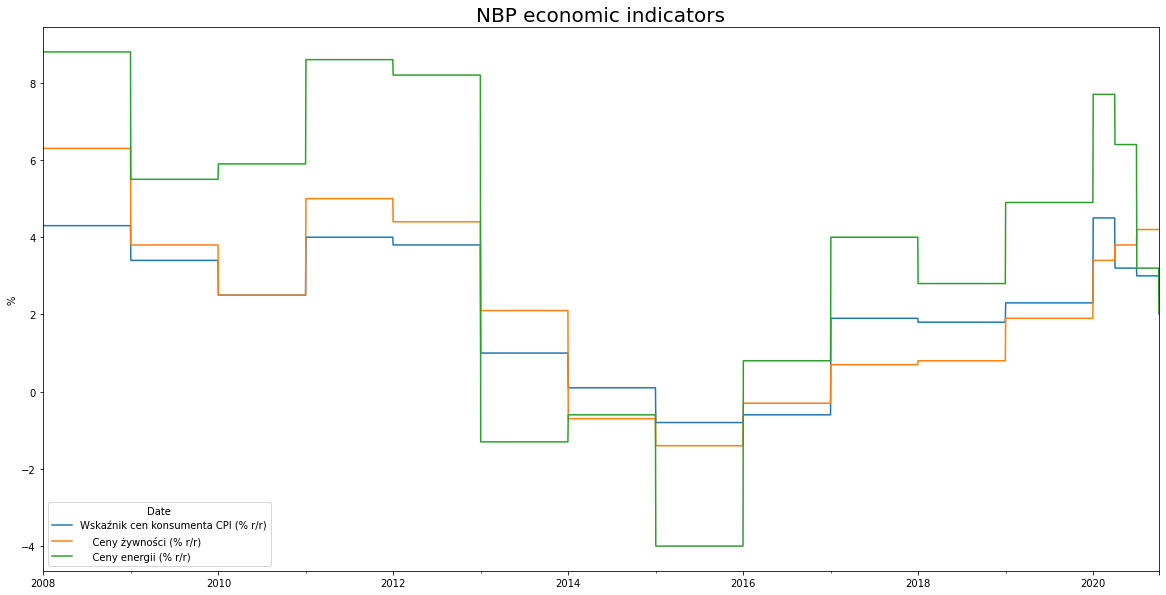

In [247]:
df_nbp.iloc[:,0:3].plot(figsize = (20,10))
plt.title('NBP economic indicators', size = 20)
plt.ylabel('%')
plt.show()

#### Save data to csv

In [248]:
df_nbp.to_csv('Data/nbp.csv')

### Joining "core" data with "NBP" data

In [249]:
currencies_5 = currencies_4.join(df_nbp, on = 'Date')

In [250]:
currencies_5 = currencies_5.ffill()

In [251]:
currencies_5.tail(10)

,USD,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,SEK,...,Wydajność pracy (% r/r),Jednostkowe koszty pracy (% r/r),Produkt potencjalny (% r/r),Luka popytowa (% PKB potencjalnego),"Indeks cen surowców rolnych (USD; 2010=1,00)","Indeks cen surowców energetycznych (USD; 2010=1,00)",Poziom cen za granicą (% r/r),PKB za granicą (% r/r),Saldo rachunku bieżącego i rachunku kapitałowego (% PKB),WIBOR 3M (%)
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-27,1.1832,123.74,1.9558,27.337,7.4406,0.90718,365.41,4.5842,4.8765,10.3060,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-10-28,1.1727,122.36,1.9558,27.422,7.4435,0.90662,367.11,4.6202,4.8768,10.3710,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-10-29,1.1704,122.09,1.9558,27.368,7.4462,0.90430,368.00,4.6225,4.8751,10.4225,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-10-30,1.1698,122.36,1.9558,27.251,7.4466,0.90208,367.45,4.6222,4.8725,10.3650,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-02,1.1652,121.93,1.9558,27.131,7.4455,0.90053,366.24,4.6018,4.8674,10.3625,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-03,1.1702,122.56,1.9558,26.913,7.4462,0.90042,363.82,4.5680,4.8675,10.3835,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-04,1.1721,122.31,1.9558,26.781,7.4466,0.89954,362.42,4.5368,4.8675,10.3520,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-05,1.1855,122.86,1.9558,26.766,7.4467,0.90450,357.83,4.5134,4.8648,10.2770,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-06,1.1870,122.66,1.9558,26.667,7.4493,0.90430,359.02,4.5263,4.8670,10.2805,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24


## Save all combined data to one csv file

### Save data to csv

In [211]:
currencies_5.to_csv('Data/currencies_and_indicators.csv')

### Load data from csv

In [212]:
df = pd.read_csv('Data/currencies_and_indicators.csv', index_col = 'Date')

In [213]:
df.tail(10)

,USD,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,SEK,...,Wydajność pracy (% r/r),Jednostkowe koszty pracy (% r/r),Produkt potencjalny (% r/r),Luka popytowa (% PKB potencjalnego),"Indeks cen surowców rolnych (USD; 2010=1,00)","Indeks cen surowców energetycznych (USD; 2010=1,00)",Poziom cen za granicą (% r/r),PKB za granicą (% r/r),Saldo rachunku bieżącego i rachunku kapitałowego (% PKB),WIBOR 3M (%)
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-27,1.1832,123.74,1.9558,27.337,7.4406,0.90718,365.41,4.5842,4.8765,10.3060,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-10-28,1.1727,122.36,1.9558,27.422,7.4435,0.90662,367.11,4.6202,4.8768,10.3710,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-10-29,1.1704,122.09,1.9558,27.368,7.4462,0.90430,368.00,4.6225,4.8751,10.4225,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-10-30,1.1698,122.36,1.9558,27.251,7.4466,0.90208,367.45,4.6222,4.8725,10.3650,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-02,1.1652,121.93,1.9558,27.131,7.4455,0.90053,366.24,4.6018,4.8674,10.3625,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-03,1.1702,122.56,1.9558,26.913,7.4462,0.90042,363.82,4.5680,4.8675,10.3835,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-04,1.1721,122.31,1.9558,26.781,7.4466,0.89954,362.42,4.5368,4.8675,10.3520,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-05,1.1855,122.86,1.9558,26.766,7.4467,0.90450,357.83,4.5134,4.8648,10.2770,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24
2020-11-06,1.1870,122.66,1.9558,26.667,7.4493,0.90430,359.02,4.5263,4.8670,10.2805,...,-4.1,8.6,-0.3,-4.9,0.87,0.47,0.2,-7.1,6.3,0.24


In [214]:
df.shape

(5701, 76)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5701 entries, 1999-01-04 to 2020-11-09
Data columns (total 76 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   USD                                                                             5701 non-null   float64
 1   JPY                                                                             5701 non-null   float64
 2   BGN                                                                             5299 non-null   float64
 3   CZK                                                                             5701 non-null   float64
 4   DKK                                                                             5701 non-null   float64
 5   GBP                                                                             5701 non-null   float64
 6   HUF   

In the next notebook book "P02-Forcasting_with_ARIMA_Model" I will build ARIMA model to forecast exchange rate for EUR/PLN.